In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 首先读取数据文件，存到DataFrame数据结构中  
注意：read_csv函数会根据每列的数据自动转换成对应的python数据类型

In [2]:
CSV_FILE_PATH = 'ex2data1.txt'
df = pd.read_csv(CSV_FILE_PATH,header=None)
df = df.rename(columns = {0:'score of exam1',1:'score of exam2',2:'Admission'})
#df = pd.read_csv(CSV_FILE_PATH,header=None, names=['score of exam1', 'score of exam2', 'Admission'])
df.head()

,score of exam1,score of exam2,Admission
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


## 数据文件可视化

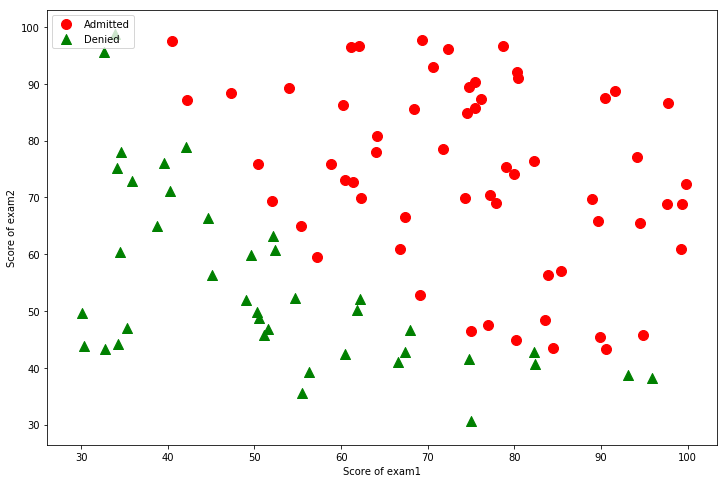

In [3]:
positive = df[df['Admission'].isin([1])]    #根据Admission列的值筛选数据
negative = df[df['Admission'].isin([0])]
plt.figure(figsize=(12,8))
plt.scatter(positive['score of exam1'], positive['score of exam2'], s=100,c='r',marker='o',label='Admitted')
plt.scatter(negative['score of exam1'], negative['score of exam2'], s=100,c='g',marker='^', label='Denied')
plt.legend(loc=2)               #在左上角展示图例
plt.xlabel('Score of exam1')
plt.ylabel('Score of exam2')
plt.show()



看起来在两类间，有一个清晰的决策边界。现在我们需要实现逻辑回归。首先
## 定义SIGMOID函数  
g 代表一个常用的逻辑函数（logistic function）为S形函数（Sigmoid function），公式为： $$g\left( z \right)=\frac{1}{1+{{e}^{-z}}}$$ 合起来，我们得到逻辑回归模型的假设函数： $${{h}_{\theta }}\left( x \right)=\frac{1}{1+{{e}^{-{{\theta }^{T}}X}}}$$

In [4]:
def sigmoid( x ):  #注意，参数x可以为一个数，也可以是ndarray
    return 1 / ( 1 + np.exp ( - x) )

可视化sigmoid函数，看看sigmoid函数是否正确

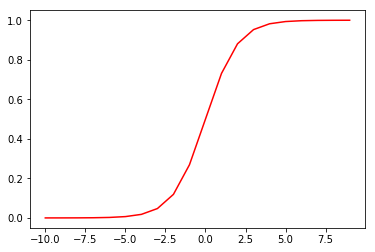

In [5]:
num = np.arange(-10,10)
plt.plot( num,sigmoid(num), 'r-')

## 定义逻辑回归的代价函数  
注意：X，theta，y的数据类型均为numpy中的matrix。X为特征矩阵，theta为行向量，y为列向量

In [6]:
def ComputeCost(X,theta,y): #X，theta，y的数据类型均为numpy中的matrix。X为特征矩阵，theta为行向量，y为列向量
    first = np.multiply( -y, np.log(sigmoid(X*theta.T)))
    second = np.multiply( 1-y, np.log( 1-sigmoid(X*theta.T)))
    return  np.sum(first - second)/len(X)

### 添加特征归一化步骤  
需要注意的地方：  
1）归一化应该只对特征矩阵执行，添加的全1列x0和结果列y都不应该执行归一化步骤  
2）dataframe的mean(),std()函数分别都是对每列求均值和均方差

In [7]:
df2 = df.iloc[:,0:-1]                 #对最后一列不用进行归一化
df2= (df2- df2.mean()) / df2.std()    #每个特征值分别减去列均值再除以列均方差进行归一化
df2.head()

,score of exam1,score of exam2
0,-1.594216,0.635141
1,-1.817101,-1.201489
2,-1.531325,0.359483
3,-0.280687,1.080923
4,0.688062,0.490905


## 为线性回归做一些初始化设置

In [8]:
df2.insert( 0,'ones',1 ) #在训练集中添加一列，以便使用向量化的解决方案来计算代价和梯度,对应公式中的x0
#X = df.iloc[:,0:-1]   #X为矩阵去除最后一列
X=df2
y = df.iloc[:,-1:]    #y为最后一列的值
#将X，y转换为numpy中的matrix,theta也初始化为matrix
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.zeros(3))

查看X，y，theta的维度

In [75]:
X.shape, y.shape, theta.shape

((100, 3), (100, 1), (1, 3))

代价函数，theta初始值为0

In [13]:
ComputeCost(X,theta,y)

0.6931471805599453


## batch gradient decent（批量梯度下降）
$${{\theta }_{j}}:={{\theta }_{j}}-\alpha \frac{\partial }{\partial {{\theta }_{j}}}J\left( \theta \right)$$
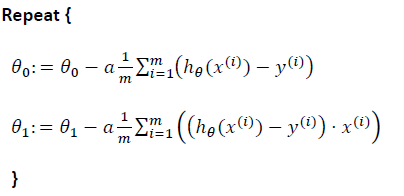  

下面这段代码不知为什么，如果直接通过  
temp = theta[0,j] - alpha * (np.sum(data) / len(X))  
theta[0,j] = temp  
则无法修改theta的值，theta一直为[0,0]  
一定要通过生成另外一个matrix，记录修改的值，再赋值给theta才行  
注意：X，theta，y的数据类型均为numpy中的matrix。X为特征矩阵，theta为行向量，y为列向量

In [14]:
def gradientDescent(X, y, theta, alpha, iters):#X，theta，y的数据类型均为numpy中的matrix。X为特征矩阵，theta为行向量，y为列向量。alpha为学习率，iters为迭代次数
    temp = np.matrix(np.zeros(theta.shape))
    cost = np.zeros(iters)     #记录每次的代价值
    for i in range(iters):
        error = sigmoid(X*theta.T) -y
        for j in range(theta.shape[1]):
            data = np.multiply(error,X[:,j])
            temp[0,j] = theta[0,j] - alpha * (np.sum(data) / len(X))
        theta = temp    
        cost[i] = ComputeCost(X,theta,y)
    return theta,cost

初始化一些附加变量 - 学习速率α和要执行的迭代次数。

In [31]:
alpha = 10
iters = 100

运行梯度下降算法来将我们的参数θ适合于训练集。

In [32]:
g,cost = gradientDescent(X,y,theta,alpha,iters)
g

matrix([[1.71733876, 4.01051657, 3.74159435]])

In [33]:
ComputeCost(X,g,y)

0.20349773676821648

绘制代价

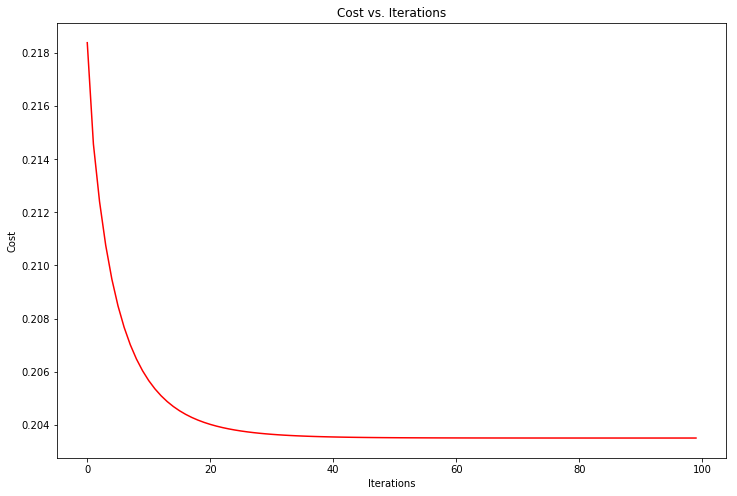

In [34]:
plt.figure(figsize=(12,8))
plt.plot(np.arange(iters), cost, 'r', label='Cost')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs. Iterations')

plt.show()

### 输出预测  
通过假设函数输出预测。 逻辑回归模型的假设函数：$$
 {{h}_{\theta }}\left( x \right)=\frac{1}{1+{{e}^{-{{\theta }^{T}}X}}} $$当${{h}_{\theta }}$大于等于0.5时，预测 y=1

当${{h}_{\theta }}$小于0.5时，预测 y=0 。


In [35]:
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]    #返回的是一个列表，对应每个数据的预测值

使用预测函数预测数据集中每一个数据，并为预测精度打分

In [41]:
predictions = predict(g, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]      #注意学习此处语法
accuracy = sum(correct) / len(correct)
print ('accuracy = {}%'.format(accuracy*100))

accuracy = 89.0%


## 正则化逻辑回归  
首先载入数据

In [57]:
CSV_FILE_PATH = 'ex2data2.txt'
df = pd.read_csv(CSV_FILE_PATH,header=None)
df = df.rename(columns = {0:'Test1',1:'Test2',2:'Accepted'})
#df = pd.read_csv(CSV_FILE_PATH,header=None, names=['score of exam1', 'score of exam2', 'Admission'])
df.describe()          #从数据分布看到不需要归一化

,Test1,Test2,Accepted
count,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525
std,0.496654,0.519743,0.502060
min,-0.830070,-0.769740,0.000000
25%,-0.372120,-0.254385,0.000000
50%,-0.006336,0.213455,0.000000
75%,0.478970,0.646562,1.000000
max,1.070900,1.108900,1.000000


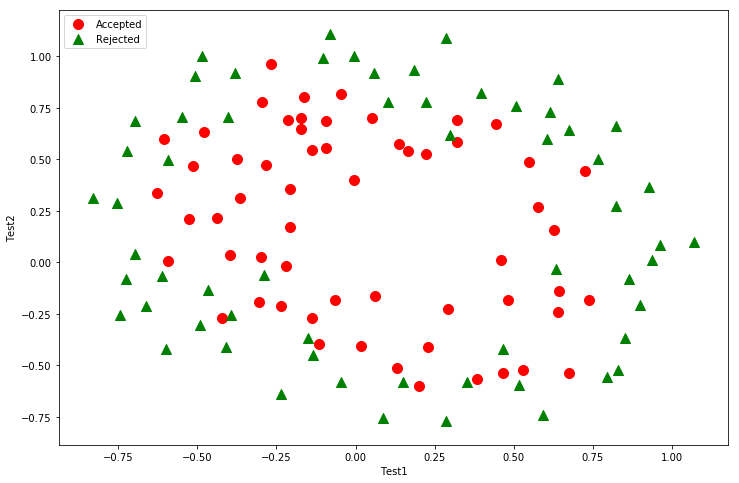

In [58]:
positive = df[df['Accepted'].isin([1])]    #根据Admission列的值筛选数据
negative = df[df['Accepted'].isin([0])]
plt.figure(figsize=(12,8))
plt.scatter(positive['Test1'], positive['Test2'], s=100,c='r',marker='o',label='Accepted')
plt.scatter(negative['Test1'], negative['Test2'], s=100,c='g',marker='^', label='Rejected')
plt.legend(loc=2)               #在左上角展示图例
plt.xlabel('Test1')
plt.ylabel('Test2')
plt.show()

In [59]:
degree = 5     #修改数据集，包含x的高次项数值,
x1 = df['Test1']
x2 = df['Test2']

df.insert(3, 'Ones', 1)

for i in range(1, degree):
    for j in range(0, i+1):
        df['F' + str(i) + str(j)] = np.power(x1, i-j) * np.power(x2, j)       #注意：不需要先添加列，直接通过赋值添加列

df.drop('Test1', axis=1, inplace=True)   #inplace=True会改变原数据
df.drop('Test2', axis=1, inplace=True)

df.head()

,Accepted,Ones,F10,F11,F20,F21,F22,F30,F31,F32,F33,F40,F41,F42,F43,F44
0,1,1,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,0.342354,0.000007,0.000094,0.001286,0.017551,0.239497
1,1,1,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,0.321335,0.000074,-0.000546,0.004035,-0.029801,0.220095
2,1,1,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,0.331733,0.002086,-0.006757,0.021886,-0.070895,0.229642
3,1,1,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,0.126650,0.019775,-0.026483,0.035465,-0.047494,0.063602
4,1,1,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,0.100960,0.069393,-0.062956,0.057116,-0.051818,0.047011


In [60]:
def sigmoid( x ):  #注意，参数x可以为一个数，也可以是ndarray
    return 1 / ( 1 + np.exp ( - x) )


## regularized cost（正则化代价函数）
$$J\left( \theta \right)=\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]}+\frac{\lambda }{2m}\sum\limits_{j=1}^{n}{\theta _{j}^{2}}$$


In [61]:
def ComputeCost(X,theta,y,numda): #X，theta，y的数据类型均为numpy中的matrix。X为特征矩阵，theta为行向量，y为列向量
    first = np.multiply( -y, np.log(sigmoid(X*theta.T)))
    second = np.multiply( 1-y, np.log( 1-sigmoid(X*theta.T)))
    reg = (numda / (2 * len(X))) * np.sum(np.power(theta, 2))
    return  np.sum(first - second)/len(X) + reg

## 正则化梯度函数：

梯度下降算法将分两种情形： ${{\theta }_{0}}:={{\theta }_{0}}-a\frac{1}{m}\sum\limits_{i=1}^{m}{[{{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}}]x_{{0}}^{(i)}}  $

 ${{\theta }_{j}}:={{\theta }_{j}}(1-a\frac{\lambda }{m})-a\frac{1}{m}\sum\limits_{i=1}^{m}{({{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}})x_{j}^{(i)}}$


In [68]:
def gradientDescent(X, y, theta, alpha, iters,numda):#X，theta，y的数据类型均为numpy中的matrix。X为特征矩阵，theta为行向量，y为列向量。alpha为学习率，iters为迭代次数
    temp = np.matrix(np.zeros(theta.shape))
    cost = np.zeros(iters)     #记录每次的代价值
    for i in range(iters):
        error = sigmoid(X*theta.T) -y
        for j in range(theta.shape[1]):
            data = np.multiply(error,X[:,j])
            if (j==0):
                temp[0,j] = theta[0,j] - alpha * (np.sum(data) / len(X))
            else:
                temp[0,j] = theta[0,j]*(1-alpha*numda/len(X))- alpha * (np.sum(data) / len(X))
        theta = temp    
        cost[i] = ComputeCost(X,theta,y,numda)
    return theta,cost

In [63]:
X = df.iloc[:,1:]     #X为第2列到最后一列的值
y = df.iloc[:,0:1]    #y为第一列的值
#将X，y转换为numpy中的matrix,theta也初始化为matrix
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.zeros(15))

In [77]:
alpha = 1
iters = 1000
numda = 1    #通过调整这个参数实现正则化

In [78]:
g,cost = gradientDescent(X,y,theta,alpha,iters,numda)
g

matrix([[ 1.28774208,  0.56744213,  1.1184087 , -2.20671391, -0.92834607,
         -1.62520867, -0.03661411, -0.36907088, -0.33634424, -0.47661336,
         -1.67874467, -0.0598562 , -0.62664523, -0.26314793, -1.5485206 ]])

In [79]:
ComputeCost(X,g,y,numda)

0.5506639380994643

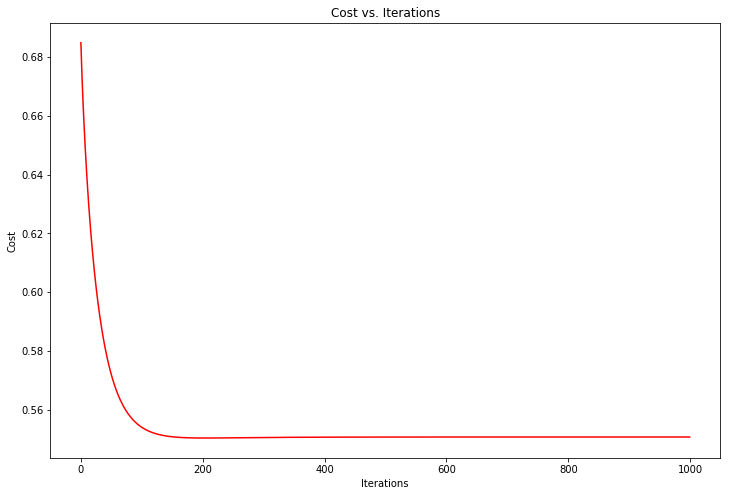

In [80]:
plt.figure(figsize=(12,8))
plt.plot(np.arange(iters), cost, 'r', label='Cost')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs. Iterations')

plt.show()

In [81]:
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]    #返回的是一个列表，对应每个数据的预测值

predictions = predict(g, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]      #注意学习此处语法
accuracy = sum(correct) / len(correct)
print ('accuracy = {}%'.format(accuracy*100))

accuracy = 82.20338983050848%
